In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from modules.utils import load_cifar10
from modules.cnn_with_spectral_pooling import CNN_Spectral_Pool

% matplotlib inline
% load_ext autoreload
% autoreload 2

In [3]:
xtrain, ytrain, xtest, ytest = load_cifar10(1, get_test_data=True, channels_last=False)

file already downloaded..
getting batch 1


In [4]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((10000, 3, 32, 32), (10000,), (10000, 3, 32, 32), (10000,))

In [11]:
# # take a small batch for testing architecture
sample_size = 32
sampleind = np.random.choice(np.arange(xtrain.shape[0]),
                             size=sample_size, replace=False)
xtrain_sample = xtrain[sampleind]
ytrain_sample = ytrain[sampleind]
# assert len(np.unique(ytrain_sample)) == 10
xtrain_sample.shape

(32, 3, 32, 32)

## test build graph:

In [12]:
cnn = CNN_Spectral_Pool(M=1,verbose=True,learning_rate=1e-3, l2_norm=0, lr_reduction_epochs=[100,150], gamma=0.25)
tf.reset_default_graph()
cnn.train(xtrain_sample, ytrain_sample, xtrain_sample, ytrain_sample,
          batch_size=8, epochs=250, extra_conv_layer=True)

Building tf graph...
Adding conv layer 1 | Input size: 32 | Input channels: 3 | #filters: 128 | filter size: 3
Adding spectral pool layer 1 | Input size: 32 | filter size: (7,7) | Freq Dropout: 28
Adding conv layer 2 | Input size: 7 | Input channels: 128 | #filters: 128 | filter size: 1
Adding conv layer 3 | Input size: 7 | Input channels: 128 | #filters: 10 | filter size: 1
Adding final softmax layer using global averaging
(?, 10)
number of batches for training: 4
training epoch 1 
32/32 loss: 2.9382338523864746 | training accuracy: 0.000% | validation accuracy : 18.750%

	Best validation accuracy! iteration:4 accuracy: 18.75%

training epoch 2 
32/32 loss: 2.288571834564209 | training accuracy: 12.500% | validation accuracy : 25.000%

	Best validation accuracy! iteration:8 accuracy: 25.0%

training epoch 3 
32/32 loss: 2.471031904220581 | training accuracy: 50.000% | validation accuracy : 28.125%

	Best validation accuracy! iteration:12 accuracy: 28.125%

training epoch 4 
32/32 loss

32/32 loss: 1.6287381649017334 | training accuracy: 37.500% | validation accuracy : 43.750%
training epoch 68 
32/32 loss: 1.6287205219268799 | training accuracy: 25.000% | validation accuracy : 40.625%
training epoch 69 
32/32 loss: 1.6283012628555298 | training accuracy: 25.000% | validation accuracy : 40.625%
training epoch 70 
32/32 loss: 1.6263651847839355 | training accuracy: 25.000% | validation accuracy : 43.750%
training epoch 71 
32/32 loss: 1.625968337059021 | training accuracy: 25.000% | validation accuracy : 40.625%
training epoch 72 
32/32 loss: 1.6239449977874756 | training accuracy: 25.000% | validation accuracy : 43.750%
training epoch 73 
32/32 loss: 1.623389482498169 | training accuracy: 25.000% | validation accuracy : 43.750%
training epoch 74 
32/32 loss: 1.6233772039413452 | training accuracy: 25.000% | validation accuracy : 43.750%
training epoch 75 
32/32 loss: 1.6224117279052734 | training accuracy: 25.000% | validation accuracy : 43.750%
training epoch 76 
32/

32/32 loss: 1.6018750667572021 | training accuracy: 37.500% | validation accuracy : 37.500%
training epoch 145 
32/32 loss: 1.6000196933746338 | training accuracy: 37.500% | validation accuracy : 37.500%
training epoch 146 
32/32 loss: 1.599156141281128 | training accuracy: 37.500% | validation accuracy : 37.500%
training epoch 147 
32/32 loss: 1.5996229648590088 | training accuracy: 37.500% | validation accuracy : 37.500%
training epoch 148 
32/32 loss: 1.6007328033447266 | training accuracy: 37.500% | validation accuracy : 37.500%
training epoch 149 
32/32 loss: 1.6005809307098389 | training accuracy: 37.500% | validation accuracy : 37.500%
training epoch 150 
	Learning rate reduced to 1.0000e-05 at epoch 150
32/32 loss: 1.5989270210266113 | training accuracy: 37.500% | validation accuracy : 37.500%
training epoch 151 
32/32 loss: 1.598757028579712 | training accuracy: 37.500% | validation accuracy : 37.500%
training epoch 152 
32/32 loss: 1.5996479988098145 | training accuracy: 37.5

32/32 loss: 1.5202791690826416 | training accuracy: 25.000% | validation accuracy : 40.625%
training epoch 221 
32/32 loss: 1.4904682636260986 | training accuracy: 25.000% | validation accuracy : 37.500%
training epoch 222 
32/32 loss: 1.6545369625091553 | training accuracy: 25.000% | validation accuracy : 53.125%
training epoch 223 
32/32 loss: 1.6669726371765137 | training accuracy: 37.500% | validation accuracy : 53.125%
training epoch 224 
32/32 loss: 1.6874608993530273 | training accuracy: 12.500% | validation accuracy : 50.000%
training epoch 225 
32/32 loss: 1.630272626876831 | training accuracy: 25.000% | validation accuracy : 46.875%
training epoch 226 
32/32 loss: 1.5768797397613525 | training accuracy: 25.000% | validation accuracy : 50.000%
training epoch 227 
32/32 loss: 1.4794809818267822 | training accuracy: 25.000% | validation accuracy : 37.500%
training epoch 228 
32/32 loss: 1.5205377340316772 | training accuracy: 37.500% | validation accuracy : 43.750%
training epoc

__Note:__ in the above output, train acc is not same as validation acc even though they are the same because of dropout applied in train and not in validation

In [8]:
cnn.calc_test_accuracy(xtrain_sample, ytrain_sample)

Building tf graph...
Adding conv layer 1 | Input size: 32 | Input channels: 3 | #filters: 128 | filter size: 3
Adding spectral pool layer 1 | Input size: 32 | filter size: (27,27) | Freq Dropout: 10
Adding conv layer 2 | Input size: 27 | Input channels: 128 | #filters: 160 | filter size: 3
Adding spectral pool layer 2 | Input size: 27 | filter size: (21,21) | Freq Dropout: 8
Adding conv layer 3 | Input size: 21 | Input channels: 160 | #filters: 192 | filter size: 3
Adding spectral pool layer 3 | Input size: 21 | filter size: (17,17) | Freq Dropout: 12
Adding conv layer 4 | Input size: 17 | Input channels: 192 | #filters: 192 | filter size: 1
Adding conv layer 5 | Input size: 17 | Input channels: 192 | #filters: 10 | filter size: 1
Adding final softmax layer using global averaging
Loading pre-trained model
INFO:tensorflow:Restoring parameters from model/test
Test accuracy: 18.750


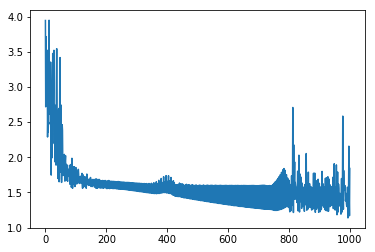

In [13]:
plt.plot(cnn.loss_vals)

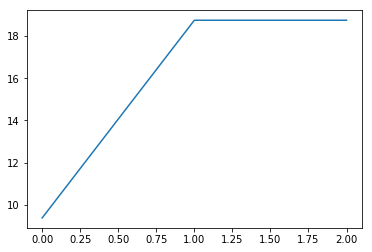

In [10]:
plt.plot(cnn.train_accuracy)

In [69]:
# show the graph
from modules.utils import show_graph 
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('model/test.meta')
    graph = tf.get_default_graph()
    show_graph(graph)

In [18]:
c

2